## Business Problem
**Uisng the given information build a model that pridict whether the business is going to bankrupt or not** 

**Importing Librarys**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Loading The Data From The Device**

In [2]:
df = pd.read_excel('bankruptcy-prevention.xlsx')
df

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy
...,...
245,0;1;1;1;1;1;non-bankruptcy
246,1;1;0.5;1;1;0;non-bankruptcy
247,0;1;1;0.5;0.5;0;non-bankruptcy
248,1;0;0.5;1;0.5;0;non-bankruptcy


**Exporting the data into csv format then again lode it not csv,**
**because in the pd.read_excel we don't have delimiter option.**

In [3]:
df.to_csv('bankruptcy-prevention.csv')
df1 = pd.read_csv('bankruptcy-prevention.csv',delimiter=';')
df1

,",industrial_risk",management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,"0,0.5",1.0,0.0,0.0,0.0,0.5,bankruptcy
1,"1,0",1.0,0.0,0.0,0.0,1.0,bankruptcy
2,"2,1",0.0,0.0,0.0,0.0,1.0,bankruptcy
3,"3,0.5",0.0,0.0,0.5,0.0,1.0,bankruptcy
4,"4,1",1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,"245,0",1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,"246,1",1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,"247,0",1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,"248,1",0.0,0.5,1.0,0.5,0.0,non-bankruptcy


**In industrial_risk Col the index value and the col value both are in same col so we have to split them.**

In [4]:
df1[',industrial_risk']

0      0,0.5
1        1,0
2        2,1
3      3,0.5
4        4,1
       ...  
245    245,0
246    246,1
247    247,0
248    248,1
249    249,1
Name: ,industrial_risk, Length: 250, dtype: object

**Creating the two col index & value then split it at , using industrial_risk col**

In [5]:
df1[['index', 'value']] = df1[',industrial_risk'].str.split(',', expand=True)
df1

,",industrial_risk",management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,index,value
0,"0,0.5",1.0,0.0,0.0,0.0,0.5,bankruptcy,0,0.5
1,"1,0",1.0,0.0,0.0,0.0,1.0,bankruptcy,1,0
2,"2,1",0.0,0.0,0.0,0.0,1.0,bankruptcy,2,1
3,"3,0.5",0.0,0.0,0.5,0.0,1.0,bankruptcy,3,0.5
4,"4,1",1.0,0.0,0.0,0.0,1.0,bankruptcy,4,1
...,...,...,...,...,...,...,...,...,...
245,"245,0",1.0,1.0,1.0,1.0,1.0,non-bankruptcy,245,0
246,"246,1",1.0,0.5,1.0,1.0,0.0,non-bankruptcy,246,1
247,"247,0",1.0,1.0,0.5,0.5,0.0,non-bankruptcy,247,0
248,"248,1",0.0,0.5,1.0,0.5,0.0,non-bankruptcy,248,1


**Droping the extra industrial_risk col and index col**

In [6]:
df2 = df1.drop(df1[[',industrial_risk','index']],axis = 1)

**Renaming the col ,industrial_risk to industrial_risk**

In [7]:
df2 = df2.rename({'value':'industrial_risk'},axis = 1)
df2

,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,industrial_risk
0,1.0,0.0,0.0,0.0,0.5,bankruptcy,0.5
1,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.0,0.0,0.5,0.0,1.0,bankruptcy,0.5
4,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...
245,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,0
246,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,0
248,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


**Just arranging the col position taking industrial_risk from last to first.**

In [8]:
df3 = df2[['industrial_risk',' management_risk',' financial_flexibility',' credibility',' competitiveness',' operating_risk',' class']]     

In [9]:
df3.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

**Checking the information of dataframe**

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    object 
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(5), object(2)
memory usage: 13.8+ KB


**The industrial_risk col it's showing as object convrted into float.**

In [11]:
df3['industrial_risk'] = df3['industrial_risk'].astype('float')

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


**Checking the number of duplicate values.**

In [13]:
df3.duplicated().sum()

147

**We have 147 duplicates,droping the duplicates.**

In [14]:
df3 = df3.drop_duplicates()
df3

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


**Checking the null values in dataframe there is no null value.**

In [15]:
df3.isna().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

**Checking the statistical parameter of dataframe**

In [16]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
industrial_risk,103.0,0.485437,0.404971,0.0,0.0,0.5,1.0,1.0
management_risk,103.0,0.563107,0.412308,0.0,0.0,0.5,1.0,1.0
financial_flexibility,103.0,0.504854,0.405206,0.0,0.0,0.5,1.0,1.0
credibility,103.0,0.582524,0.377668,0.0,0.5,0.5,1.0,1.0
competitiveness,103.0,0.640777,0.410747,0.0,0.5,1.0,1.0,1.0
operating_risk,103.0,0.514563,0.439788,0.0,0.0,0.5,1.0,1.0


**Ploting the box plot to check the outliers in data there is no outliers**

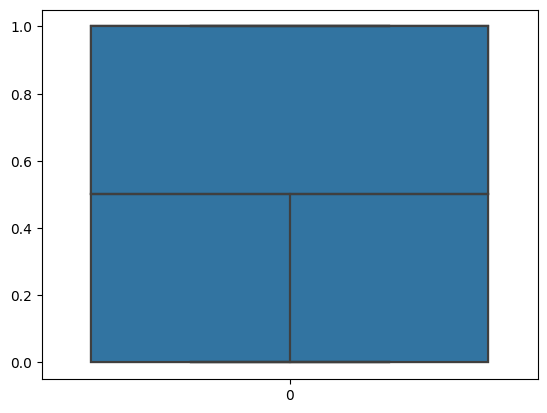

In [17]:
sns.boxplot(df3['industrial_risk'])
sns.boxplot(df3[' management_risk'])
sns.boxplot(df3[' financial_flexibility'])
sns.boxplot(df3[' credibility'])
sns.boxplot(df3[' competitiveness'])
sns.boxplot(df3[' operating_risk'])
plt.show()


**In the data the output col class is in the categorical from coverting it into numerical using LabelEncoder**

In [18]:
label_encoder = LabelEncoder()
df3[' class']= label_encoder.fit_transform(df3[' class'])
df3[' class'].unique()

array([0, 1])

**The above code (LabelEncoder) convert bankruptcy = 0 and non-bankruptcy = 1**

In [19]:
df3

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,1
187,0.0,0.5,0.5,0.5,1.0,0.5,1
190,0.0,0.5,0.5,0.0,1.0,0.0,1
192,0.5,1.0,0.0,0.0,1.0,0.0,1


**Checking the correlation of the col** 

In [20]:
df3.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.225742,-0.074246,0.056011,-0.208575,0.152581,-0.217132
management_risk,0.225742,1.000000,-0.163226,-0.112473,-0.125335,0.089500,-0.188887
financial_flexibility,-0.074246,-0.163226,1.000000,0.397757,0.525996,-0.000401,0.624573
credibility,0.056011,-0.112473,0.397757,1.000000,0.524773,-0.110603,0.606350
competitiveness,-0.208575,-0.125335,0.525996,0.524773,1.000000,-0.052165,0.859809
operating_risk,0.152581,0.089500,-0.000401,-0.110603,-0.052165,1.000000,-0.136393
class,-0.217132,-0.188887,0.624573,0.606350,0.859809,-0.136393,1.000000


**IN this correlation matrix we can see no columns are correlated to each other neither input variables**

**Univariate Analysis**

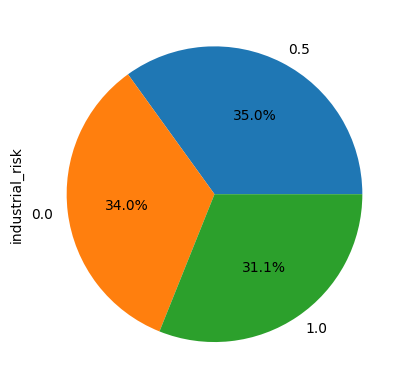

In [21]:
df3['industrial_risk'].value_counts().plot(kind = 'pie',autopct="%.1f%%")
plt.show()

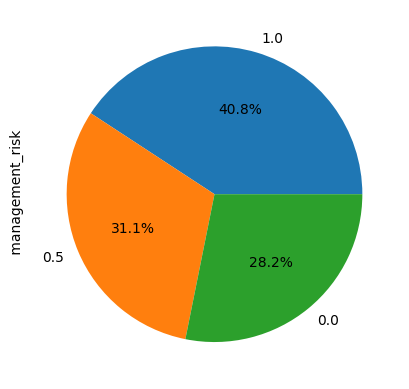

In [22]:
df3[' management_risk'].value_counts().plot(kind = 'pie',autopct="%.1f%%")
plt.show()

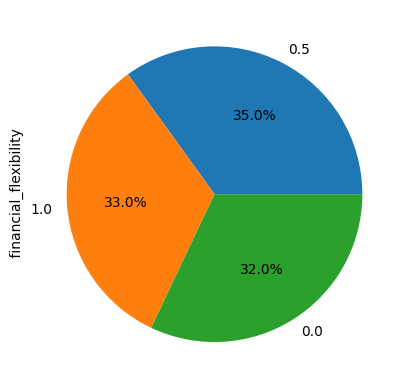

In [23]:
df3[' financial_flexibility'].value_counts().plot(kind = 'pie',autopct="%.1f%%")
plt.show()

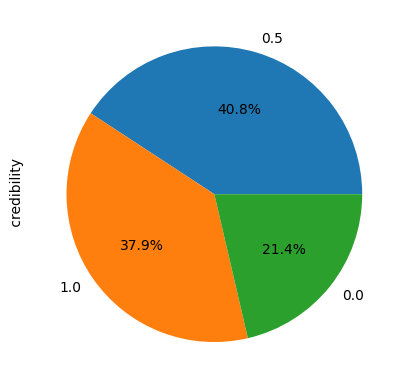

In [24]:
df3[' credibility'].value_counts().plot(kind = 'pie',autopct="%.1f%%")
plt.show()

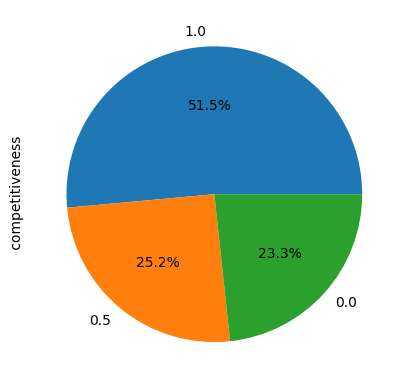

In [25]:
df3[' competitiveness'].value_counts().plot(kind = 'pie',autopct="%.1f%%")
plt.show()

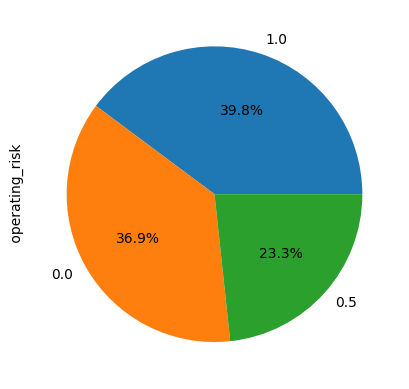

In [26]:
df3[' operating_risk'].value_counts().plot(kind = 'pie',autopct="%.1f%%")
plt.show()

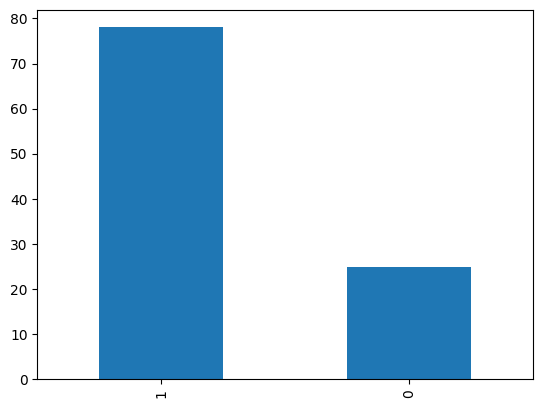

In [27]:
df3[' class'].value_counts().plot(kind = 'bar')
plt.show()

**In class, most of the companies are nonbankrupt**

**Bivariate Analysis**

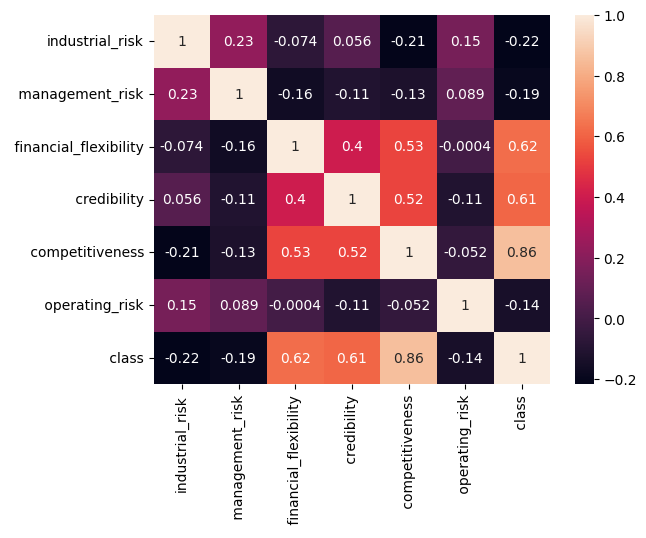

In [28]:
sns.heatmap(df3.corr(),annot = True)
plt.show()

In [29]:
df.columns

Index(['industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class'], dtype='object')

**When the  competitiveness is 0 24 compnay got bankrupt and When the  competitiveness is 0.5 1 compnay got bankrupt and 25 are non-bankrupt and When the  competitiveness is 1 53 compnay are non bankrupt**

<Axes: xlabel=' class', ylabel=' competitiveness'>

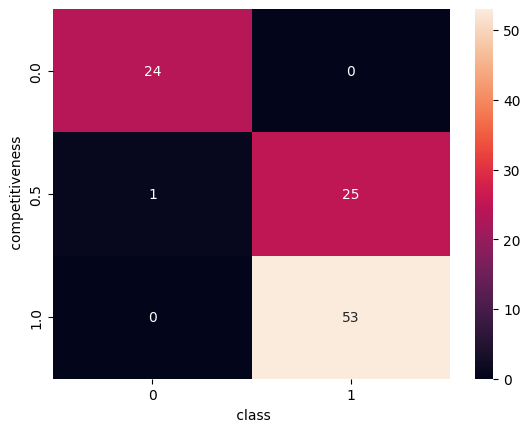

In [30]:
sns.heatmap(pd.crosstab(df3[' competitiveness'],df3[' class']),annot = True)

**When the credibility is 0 18 compnay got bankrupt and 4 are non-bankrupt and When the competitiveness is 0.5 5 compnay got bankrupt and 37 are non-bankrupt and When the competitiveness is 1 3 compnay are bankrupt and 37 are non bankrupt.**

<Axes: xlabel=' class', ylabel=' credibility'>

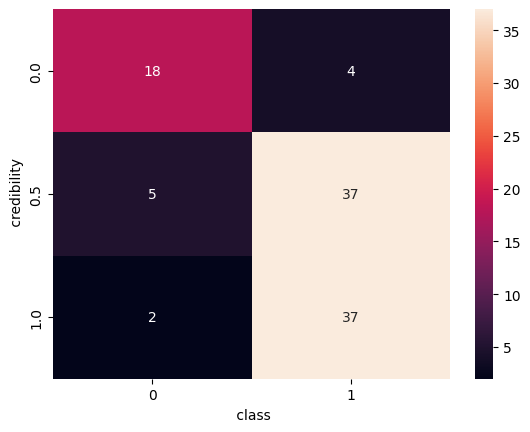

In [31]:
sns.heatmap(pd.crosstab(df3[' credibility'],df3[' class']),annot = True)

**When the financial_flexibility is 0 23 compnay got bankrupt and 10 are non-bankrupt and When the competitiveness is 0.5 1 compnay got bankrupt and 35 are non-bankrupt and When the competitiveness is 1 1 compnay are bankrupt and 35 are non bankrupt.**

<Axes: xlabel=' class', ylabel=' financial_flexibility'>

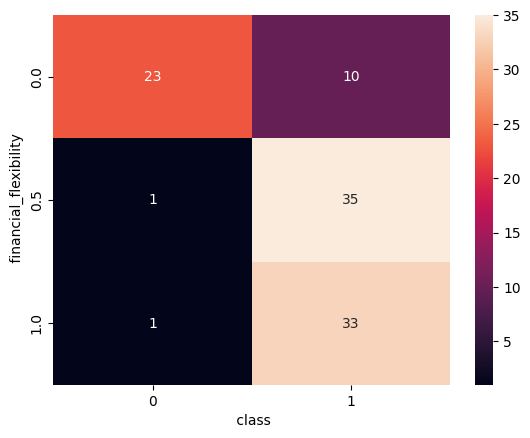

In [32]:
sns.heatmap(pd.crosstab(df3[' financial_flexibility'],df3[' class']),annot = True)

# Conclusion
### 1)In data all the column are categorical the categories are 0.00,0.5 and 1.00
### 2)In the data there 57.2% values are duplicated.
### 3)The complete data is ranges bewteen 0-1 so there are no outlier in the data the data is uniform.
### 4)In the data the col competitiveness ,credibility and financial_flexibility has strong positive correlatio or too much impact on class
### 5)Whenever the risk is high the bankruptcy is low and whenever the risk is low bankruptcy is high.

**Selecting Only those col which have strong positive correlation with claas(Output).**

In [33]:
df4 = df3[[' financial_flexibility',' competitiveness',' credibility',' class']]

In [34]:
df4

,financial_flexibility,competitiveness,credibility,class
0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0
3,0.0,0.0,0.5,0
4,0.0,0.0,0.0,0
...,...,...,...,...
185,0.0,1.0,0.5,1
187,0.5,1.0,0.5,1
190,0.5,1.0,0.0,1
192,0.0,1.0,0.0,1


**Using the Lazypredict to check accuraccy of different algorethem on data**

In [37]:
from lazypredict.Supervised import LazyClassifier
X_train, X_test, y_train, y_test = train_test_split(df4.drop(columns = [' class']),
                                                    df4[' class'],
                                                    test_size=0.20,
                                                    random_state =42)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 28.34it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    1.00               1.00     1.00      1.00   
RidgeClassifierCV                  1.00               1.00     1.00      1.00   
RidgeClassifier                    1.00               1.00     1.00      1.00   
KNeighborsClassifier               1.00               1.00     1.00      1.00   
LabelPropagation                   1.00               1.00     1.00      1.00   
LabelSpreading                     1.00               1.00     1.00      1.00   
LinearDiscriminantAnalysis         1.00               1.00     1.00      1.00   
BernoulliNB                        0.95               0.97     0.97      0.95   
AdaBoostClassifier                 0.95               0.90     0.90      0.95   
XGBClassifier                      0.95               0.90     0.90      0.95   
SVC                         

**As we have only 107 data points most of algorithames giveing the 100% accuracy this indicats the model is overfit.**

In [38]:
X_train

,financial_flexibility,competitiveness,credibility
136,1.00,1.00,1.00
36,0.00,0.00,1.00
151,1.00,1.00,0.50
127,1.00,0.50,0.50
185,0.00,1.00,0.50
...,...,...,...
154,1.00,1.00,1.00
19,0.00,0.00,0.00
179,1.00,1.00,0.50
134,0.50,0.50,0.50


In [39]:
X_test

,financial_flexibility,competitiveness,credibility
112,1.00,1.00,1.00
150,1.00,1.00,0.50
145,1.00,0.50,0.50
130,1.00,0.50,1.00
125,1.00,1.00,0.50
123,0.50,1.00,0.50
175,1.00,1.00,0.50
128,0.50,0.50,1.00
10,0.50,0.00,0.00
0,0.00,0.00,0.00


**Creating an object of DecisionTreeClassifier as clf and fit the object so that model will learn the parameter.**

In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

**Predicting the output of 20% traning data.**

In [41]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

**Calculate the accuracy score.**

In [42]:
accuracy_score(y_test,y_pred)

0.9523809523809523

**Creating a custom input.**

In [43]:
user_input = np.array([0.50,0.50,0.00]).reshape(1,3)

**Predicting the output on custom data.**

In [44]:
clf.predict(user_input)

array([1])

------------------------------
